# Análise de Dados  - Cardio Catch Diseases

A Cadio Catch Diseases é uma empresa especializada em detecção de doenças cardíacas em estágios iniciais. O seu modelo de negócio é do tipo Serviço, ou seja, a empresa ofereço o diagnóstico precoce de uma doença cardiovascular por um certo preço.

`O preço do diagnóstico, pago pelo cliente, varia de acordo com a precisão conseguida pelo time de especialistas, o cliente paga R$500,00 a cada 5% de acurácia acima de 50%. Por exemplo, para uma precisão de 55%, o diagnóstico custa R$500,00 para o cliente, para uma precisão de 60%, o valor é de R$ 1000,00 e assim por diante. Se a precisão do diagnóstico for 50% o cliente não paga por ele.`

### Perguntas que devem ser respondidas ao CEO
- Qual a Acurácia e a Precisão da ferramenta?
- Quanto lucro a Cardio Catch Diseases passará a ter com a nova ferramenta?
- Qual a Confiabilidade do resultado dados pela nova ferramenta?

________

## Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e Tratamento dos Dados

Começamos com a leitura do nosso dataset, que será usado no decorrer do projeto. Após isso, realizei o tratamento da coluna de idade ("age"), pois ela estava sendo dada em dias e não em anos como comumente usamos. Além disso, realizei a adição de uma nova coluna, onde ficará contido o imc das pessoas, visto que faria mais sentido ter esse dado durante a analise.

Durante a analise, foi encontrado vários dados como outliers, nas colunas de imc, pressão sistolica e pressão diastolica. Foi realizado uma query e consequentemente, a exclusão desses dados. Dados outliers atrapalhavam na observação e consequentemente, dariam problemas para nosso modelo.

(o dataframe gerado a baixo ainda possui os dados outliers)

In [37]:
df = pd.read_csv('cardio_train.csv', sep=';')
imcs = []

for i in range(0,len(df)):
    # Converte a idade de dias para anos
    idade = df.iloc[i]['age']
    df.at[i,'age'] = int(idade/365)
    
    # Calculo o imc e armazena em uma lista 
    altura = df.iloc[i]['height']/100
    peso = df.iloc[i]['weight']
    
    imc = round(peso/(altura*altura),2)
    imcs.append(imc)    
    
df['imc'] = imcs
    
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01


### Dados Outliers

<AxesSubplot:xlabel='imc'>

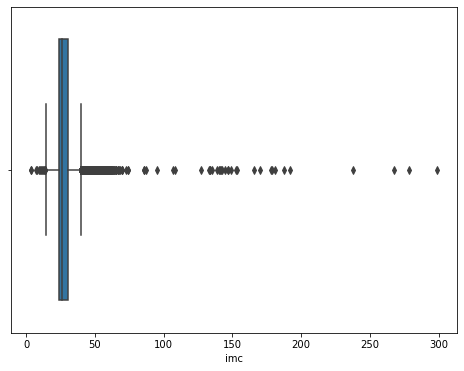

In [3]:
plt.figure(figsize=(8,6))
sns.boxplot(x='imc', data=df)

<AxesSubplot:xlabel='ap_hi'>

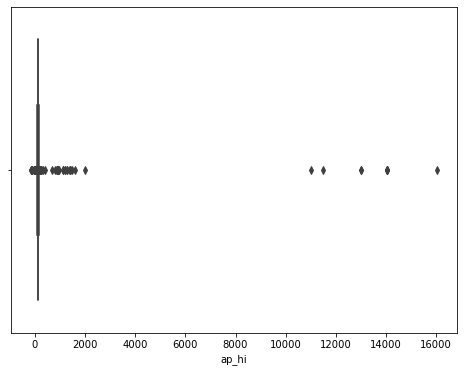

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ap_hi', data=df)

<AxesSubplot:xlabel='ap_lo'>

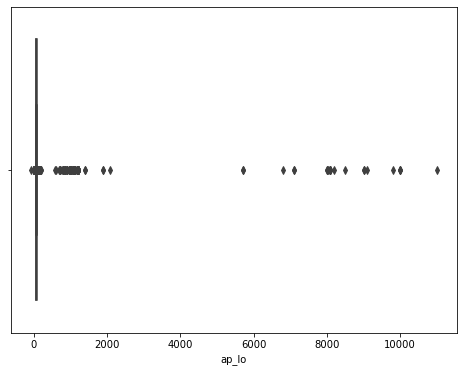

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ap_lo', data=df)

Foi realizado então a filtragem desses dados removendo os valores outliers. A determinação dos intervalos foi obtida através de pesquisas realizadas na web, procurando por cada um dos assuntos especificos.

In [39]:
df = df.query('ap_hi>=60 and ap_hi<=180')
df = df.query('ap_lo>=40 and ap_lo<=140')
df = df.query('imc>=14 and imc<=60')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01


`Depois da filtragem, nosso data frame reduziu cerca de 2% (1603 elementos).`

### Após a filtragem

<AxesSubplot:xlabel='imc'>

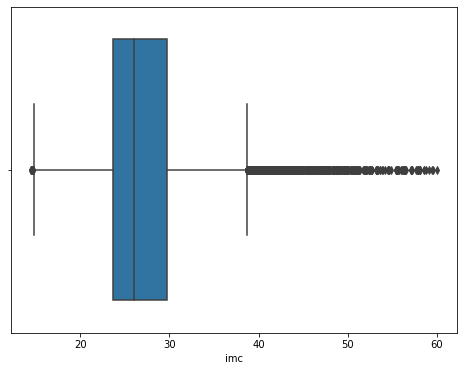

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='imc', data=df)

<AxesSubplot:xlabel='ap_hi'>

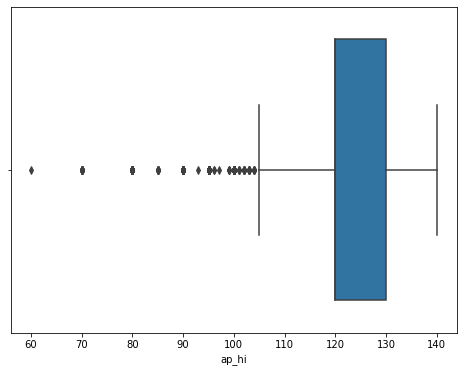

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ap_hi', data=df)

<AxesSubplot:xlabel='ap_lo'>

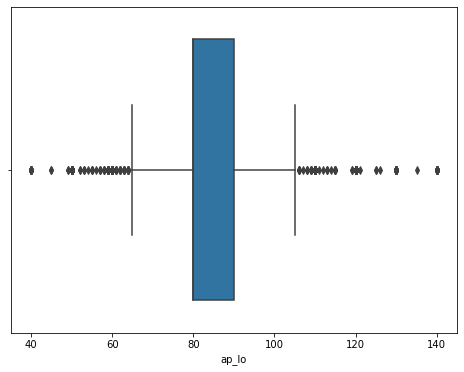

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ap_lo', data=df)

## Hipóteses e Observações

#### 1)  É possível observar que o dataset utilizado é ocupado predominantemente por homens, com cerca de 65.2%.


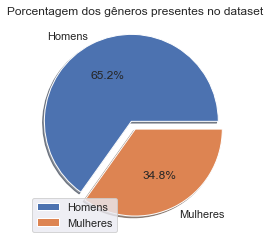

In [50]:
valores = [a for a in df['gender'].value_counts()]

explode = (0.1, 0) 

plt.pie(valores, labels=["Homens","Mulheres"],shadow=True, explode=explode, autopct='%1.1f%%')
plt.legend(["Homens","Mulheres"], loc=3)
plt.title("Porcentagem dos gêneros presentes no dataset")
plt.show()

#### 2)  O dataset também possui uma variedade de idades considerável, variando entre 29 até 64 anos

<AxesSubplot:xlabel='age', ylabel='Count'>

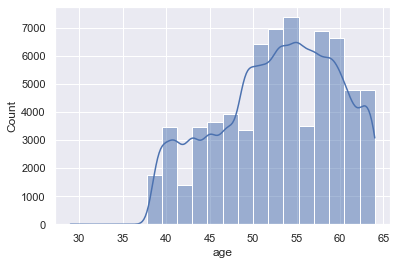

In [119]:
sns.histplot(x='age',data=df, bins=20, kde=True)

In [65]:
df['age'].unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30], dtype=int64)

**3)** Quando realizado a filtragem buscando quais idades tinham mais pessoas com problemas cardíacos, chegamos ao gráfico observado a baixo. Vale salientar que tanto homens quanto as mulheres possum uma alta quantidade de cardíacos na mesma faixa de idade, mudando apenas a ordem, que nas mulheres começa com 57 anos.

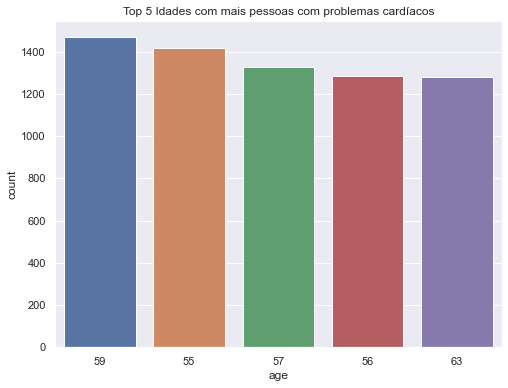

In [86]:
df_cardio = df.query('cardio==1 and gender == 1')
age_value = df_cardio['age'].value_counts().index[:5]
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'age', data = df_cardio.query('age in @age_value'), order=age_value)
ax.set_title("Top 5 Idades com mais pessoas com problemas cardíacos")
plt.show()

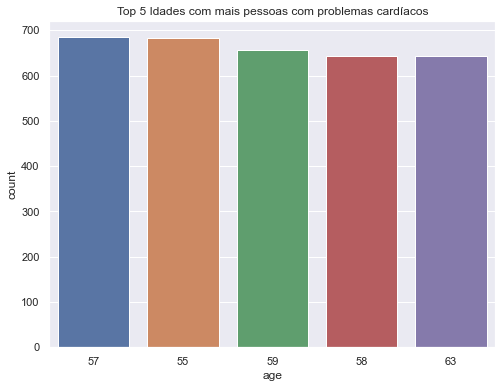

In [85]:
df_cardio_m = df.query('cardio==1 and gender == 2')
age_value = df_cardio['age'].value_counts().index[:5]
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'age', data = df_cardio.query('age in @age_value'), order=age_value)
ax.set_title("Top 5 Idades com mais pessoas com problemas cardíacos")
plt.show()

**4)**   Antes de começar a analisar os dados a fundo, pensei que com o atributo active (que significa praticante de atividade física), eu poderia achar uma lógica e nele encontrar mais pessoas cardíacas. Porém quando analisei os dados, encontrei uma grande quantidade das pessoas, fazendo atividades. Isso me levou a levantar duas hipóteses:

- Essas pessoas após receberem o laudo deram inicio as atividades, na busca por uma vida saúdavel afim de evitar doenças futuras ou problemas.

- Essas pessoas apesar de treinar, não se cuidam e acabam que apesar de manterem um ritmo de atividades físicas, elas acabam se anulando devido ao descuido com outras partes, como por exemplo, alimentação.

In [69]:
pd.crosstab([df['gender'],df['active']],df['cardio'])

cardio             0      1
gender active              
1      0        4225   4605
       1       18461  17270
2      0        2080   2536
       1        9889   9331

**5)** A média do imc das pessoas com problemas cardíacos é dado por 28, ou seja, sobrepeso. Abaixo temos um boxplot do imc das idades com mais pessoas cardíacas

In [93]:
df_c = df.query('cardio==1')
df_c['imc'].mean()

28.43445142552309

<AxesSubplot:xlabel='age', ylabel='imc'>

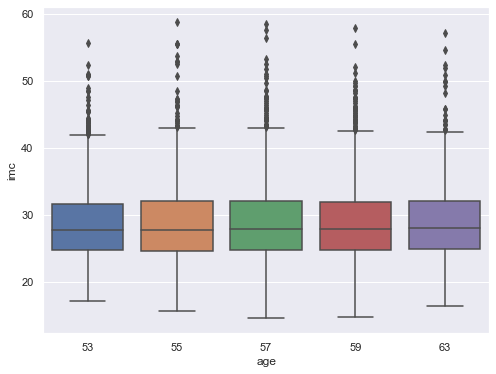

In [100]:
df_ct = df.query('cardio==1')
imc_value = df_ct['age'].value_counts().index[:5]
plt.figure(figsize=(8,6))
sns.boxplot(y='imc', x='age', data=df_ct.query('age in @imc_value'))

**6)** Abaixo podemos ver um gráfico de calor, onde conseguimos enxergar a correlação das váriaveis presentes no dataset. Uma correlação forte que temos com os cardiacos é o atributo de pressão.

In [113]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
id,1.000000,0.003580,0.002632,-0.003371,-0.001551,0.000633,-0.001404,0.005807,0.001919,-0.003662,0.000705,0.003457,0.003745,0.000135
age,0.003580,1.000000,-0.023143,-0.084255,0.054627,0.211361,0.153996,0.154819,0.098439,-0.047906,-0.029391,-0.010617,0.239512,0.101552
gender,0.002632,-0.023143,1.000000,0.514051,0.158149,0.060531,0.067609,-0.036825,-0.021478,0.338248,0.170721,0.005394,0.006634,-0.109985
height,-0.003371,-0.084255,0.514051,1.000000,0.311697,0.020652,0.039065,-0.054293,-0.020697,0.193517,0.097795,-0.009300,-0.011954,-0.210241
weight,-0.001551,0.054627,0.158149,0.311697,1.000000,0.269176,0.249453,0.141590,0.106996,0.066851,0.067750,-0.018155,0.179922,0.857416
ap_hi,0.000633,0.211361,0.060531,0.020652,0.269176,1.000000,0.703682,0.193364,0.091395,0.024903,0.029782,-0.000190,0.431380,0.264245
ap_lo,-0.001404,0.153996,0.067609,0.039065,0.249453,0.703682,1.000000,0.158658,0.073318,0.023699,0.038382,0.000218,0.337505,0.234607
cholesterol,0.005807,0.154819,-0.036825,-0.054293,0.141590,0.193364,0.158658,1.000000,0.451026,0.009786,0.034694,0.009016,0.221164,0.172148
gluc,0.001919,0.098439,-0.021478,-0.020697,0.106996,0.091395,0.073318,0.451026,1.000000,-0.005974,0.010119,-0.007906,0.089278,0.119453
smoke,-0.003662,-0.047906,0.338248,0.193517,0.066851,0.024903,0.023699,0.009786,-0.005974,1.000000,0.338068,0.025179,-0.016730,-0.034148


<AxesSubplot:>

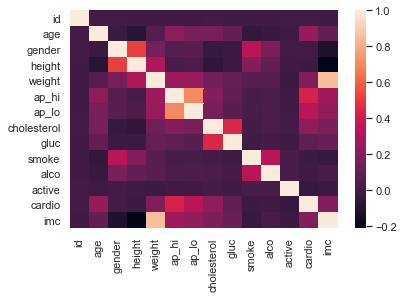

In [111]:
sns.heatmap(df.corr())

_____

## Modelos de Machine Learning

Durante os testes, fiz uso de 3 modelos de machine learning e obtive as seguintes porcentagens de acurâcia:

- LinearSVC - 54.8%
- Random Forest - 69%
- Decision Tree - 72.45%

Por fim, decidi fazer uso do modelo Decision Tree para realizar a predição dos clientes da Cardio Catch Diseases. Pois com seus resultados fixos e assertivos, ele traz estabilidade financeira para empresa, que tem como certeza o lucro por cada exame.

#### Divisão dos dados

In [128]:
from sklearn.model_selection import train_test_split

x = df[['age','gender','ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active','imc']]

y = df['cardio'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 527)

#### LinearSVC

In [130]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

linearsvc = LinearSVC()

linearsvc.fit(x_train,y_train)

previsoes = linearsvc.predict(x_test)

taxa_de_acerto = accuracy_score(y_test,previsoes)
print("Taxa de acertos %.2f " % (taxa_de_acerto*100))

Taxa de acertos 54.82 


C:\Users\Raffael\anaconda3\envs\Data-Science\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

previsoes = rf.predict(x_test)

taxa_de_acerto = accuracy_score(y_test,previsoes)
print("Taxa de acertos %.2f " % (taxa_de_acerto*100))

Taxa de acertos 69.00 


#### Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(x_train, y_train)

previsoes = modelo_arvore.predict(x_test)

taxa_de_acerto = accuracy_score(y_test,previsoes)
print("Taxa de acertos %.2f " % (taxa_de_acerto*100))

Taxa de acertos 72.45 


_____________

# Perguntas Feitas Pelo CEO 

### Qual a Acurácia e a Precisão da ferramenta?

O modelo se encontra com 72.45% de acurácia. Superando a precisão anterior que a empresa tinha, que era entre 55-65%.

### Quanto lucro a Cardio Catch Diseases passará a ter com a nova ferramenta?

Pra cada exame que for feito, a empresa terá um lucro de 2000.00 reais, pois é uma precisão 20 porcento acima da média. Como não será mais necessário a contratação de técnicos para analisar e prever esses dados (nem mesmo do revezamento desses funcionários), o retorno líquido será de R$2000.


### Qual a Confiabilidade do resultado dados pela nova ferramenta?

A confiabilidade é alta, pois os dados foram otimizados para melhor retorno na obtenção do resultado esperado. Além do mais, foram testados modelos diferentes, afim de descobrir qual tinha uma melhor execução para retorno dos nossos resultados. Então, posso afirmar que a confiabilidadade dos resultados é alta.

______

## Referências: 

- [Problema Cardio Catch Diseases](https://sejaumdatascientist.com/projeto-de-data-science-diagnostico-precoce-de-doencas-cardiovasculares/)
- [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)